Afonso Lavado | 20220631@novaims.unl.pt

Afonso Reyna | 20191197@novaims.unl.pt

Fernando Cruz | 20220646@novaims.unl.pt

Mariana Rodrigues | 20220627@novaims.unl.pt

Pedro Fernandes | 20220592@novaims.unl.pt 

Data Source | https://drive.google.com/file/d/1bs3GM_j9XScOEm-mNOG3ZEYg7-NVTc1C/view?usp=share_link


#1 - Summary and findings
## 1.1 - Summary

---
- The idea in this notebook is to perform the preprocessing and the data augmentation in our images. 
---
- Our **preprocessing** involves resizing the images, so that they can be effectively used as input for our model. This step involves techniques such as cropping, resizing, and color balancing. Regarding the resizing, we thought about 2 differente approaches:
  - consider the size_image = smallest size image 
  - reduce the size to (128,128)

  We chose to try both practices and evaluate the performance of the model and then determine the optmial size for our specific task.
---
- To improve our model´s performance, we performed **data augmentation** on the training set. Our augmented images include transformations such as: rotation, horizontal and vertical flip, zoom, translation and contrast and brightness transformations. 

  In order to achieve the best tranformations to do in data augmentation, we started the process by doing and experimenting some basic and simple transformations to see which ones work best for our dataset, in order to increase the variability and prevent the overfitting.

---
## 1.2 - Findings
In this notebook, we can know the number of images of the 10 classes in training and testing set, as well as the total number of files in both training and testing. It is also possible to know which is the size of the smallest image (256, 224). Regarding image transformatios, we can always compare the orginal image with its respective rotations considering different degrees, horizontal and vertical flips, zoom, saturation changes, central cropps, translactions,  brighness, contrast and changings to negative colours. 
As we refered previously, we evaluated the performance of the model considering the 2 different approaches about the image size, and the conclusions were: 
  - (256, 224): test loss:  7.028685092926025 | test accuracy:  0.9057871699333191
  - (360,640): test loss:  2.3134143352508545 | test accuracy:  0.8999999761581421
  - (128,128): test loss:  27.213977813720703 | test accuracy:  0.8867055177688599

Considering the results above, the image shape=(256, 224) has the best statistics, is relatively fast and got the best accuracy. So, the decision is to use the image shape = (256, 224).

Regarding data augmentation, we tried a lot of transformations, changing the parameters of each change, and after that, we defined a final augmentation with the transformations that would make more sense, considering our data exploration. So, the final data augmentation is Normalizing the pixel values, Flipping the images randomly, Rotating randomly, zooming in and out, adjusting the contrast and finally, traslating vertically or horizontally.

# 2 - Imports and acessing the Dataset



## 2.1 - Imports

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers, initializers, regularizers, optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom, RandomContrast, RandomTranslation
from tensorflow.keras.preprocessing.image import random_brightness, random_shear, random_shift 
#from tensorflow.python.keras.preprocessing.image import random_crop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from keras import layers
import keras
from keras.preprocessing.image import ImageDataGenerator

import cv2
from google.colab.patches import cv2_imshow
import os
import time
import shutil
import random 
import zipfile

import numpy as np
import pandas as pd
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from PIL import Image

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import random_shear

## 2.2 - Acessing Data

In [2]:
# #Downloading the Dataset
# !gdown --fuzzy https://drive.google.com/file/d/1bs3GM_j9XScOEm-mNOG3ZEYg7-NVTc1C/view?usp=share_link
# #Extracting the Dataset to Content
# zip_ = zipfile.ZipFile('Sports10_clean.zip')
# zip_.extractall()
# zip_.close()
# #Defining the path to the folder
# path = "/content/content/"
# main_folder, training_folder, testing_folder = "Sports10_clean/", "training_set/", "test_set/"

In [3]:
gdrive = True
path = "/content/drive/MyDrive/DL/"
main_folder, training_folder, testing_folder = "Sports10_clean/", "training_set/", "test_set/"
if gdrive:
    from google.colab import drive
    drive.mount('/content/drive')        
    t0 = time.time()
    shutil.copyfile(path + 'Sports10_clean.zip', 'Sports10_clean.zip')
    zip_ = zipfile.ZipFile('Sports10_clean.zip')
    zip_.extractall()
    zip_.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    path = ""

Mounted at /content/drive
File transfer completed in 204.895 seconds


## 2.3 - Images visualization
The images visualization code was copied from the explore.ipynb notebook.

In [44]:
path = "/content/content/"

First, let´s try to understand how distributed are the images per sport and training ou test set.

In [45]:
#number of instances of sport in the training and test set
for split in [training_folder, testing_folder]:
    for c in ["AmericanFootball", "Basketball", "BikeRacing", "CarRacing", "Fighting", "Hockey", "Soccer", "TableTennis", "Tennis", "Volleyball"]:
        n_train_c = len(os.listdir(path + main_folder + split + f"/{c}"))
        print(f"Nº of instances of class {c} in the {split}: {n_train_c}")

Nº of instances of class AmericanFootball in the training_set/: 7215
Nº of instances of class Basketball in the training_set/: 7351
Nº of instances of class BikeRacing in the training_set/: 7483
Nº of instances of class CarRacing in the training_set/: 8183
Nº of instances of class Fighting in the training_set/: 7144
Nº of instances of class Hockey in the training_set/: 6950
Nº of instances of class Soccer in the training_set/: 6728
Nº of instances of class TableTennis in the training_set/: 7831
Nº of instances of class Tennis in the training_set/: 6624
Nº of instances of class Volleyball in the training_set/: 7043
Nº of instances of class AmericanFootball in the test_set/: 2785
Nº of instances of class Basketball in the test_set/: 2649
Nº of instances of class BikeRacing in the test_set/: 2517
Nº of instances of class CarRacing in the test_set/: 1818
Nº of instances of class Fighting in the test_set/: 2856
Nº of instances of class Hockey in the test_set/: 3050
Nº of instances of class 

In [46]:
df_train, df_val = image_dataset_from_directory(path + main_folder + training_folder,  #define the data for train and for test
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                label_mode=label_mode,
                                                validation_split=validation_split, 
                                                color_mode=color_mode,
                                                shuffle=shuffle,
                                                batch_size=batch_size,
                                                subset='both',
                                                seed=seed)

print("\nObject's type:\t", )
print("Is it a tf.data.Dataset?\t R:",isinstance(df_train, tf.data.Dataset) )
print("Classes:",df_train.class_names)

Found 72552 files belonging to 10 classes.
Using 50787 files for training.
Using 21765 files for validation.

Object's type:	
Is it a tf.data.Dataset?	 R: True
Classes: ['AmericanFootball', 'Basketball', 'BikeRacing', 'CarRacing', 'Fighting', 'Hockey', 'Soccer', 'TableTennis', 'Tennis', 'Volleyball']


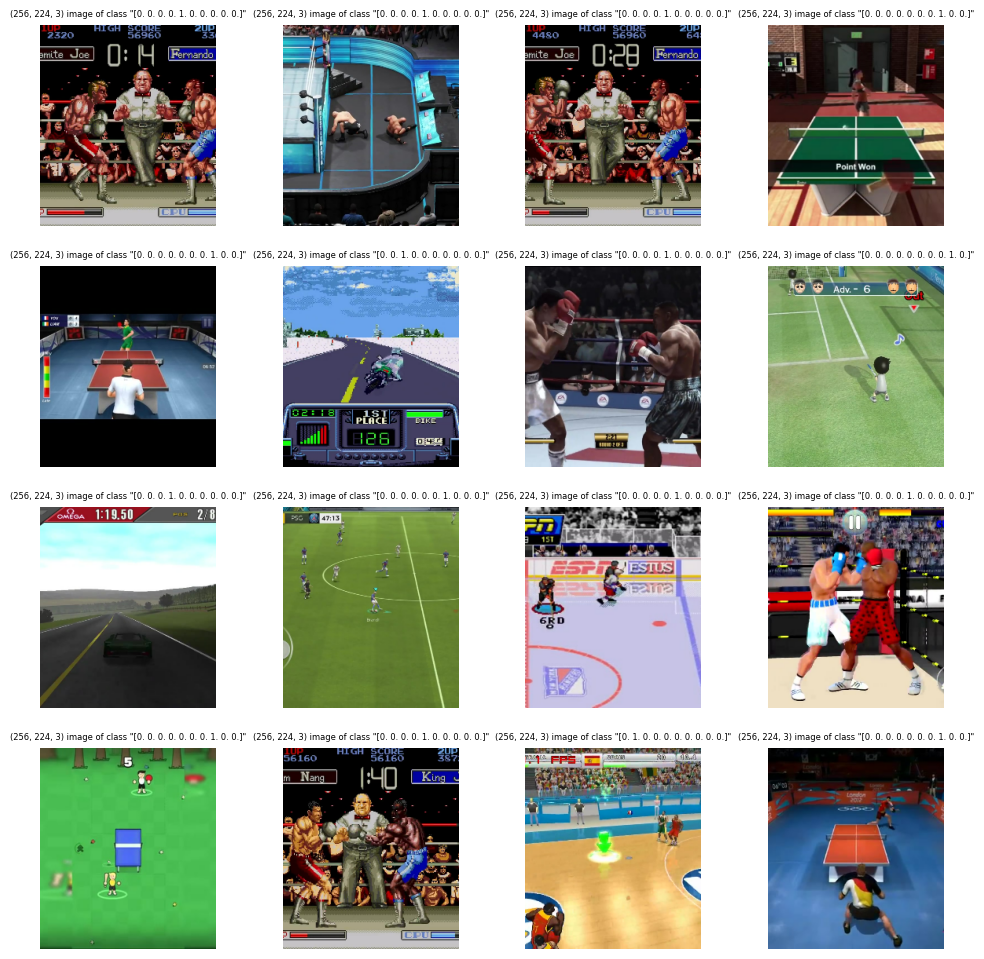

In [47]:
def show_batch(df, grid_size=(4, 4)):
    n_images = grid_size[0]*grid_size[1]
    iter_ = iter(df)
    batch_x, batch_y = iter_.next()
    batch_x, batch_y = batch_x[0:n_images], batch_y[0:n_images]
    plt.figure(figsize=(12, 12)) # Plot images
    for i, (img, y) in enumerate(zip(batch_x, batch_y)):
        ax = plt.subplot(grid_size[0], grid_size[1],  i + 1)
        plt.imshow(tf.cast(img, tf.int32))
        plt.title("{} image of class \"{}\"".format(img.shape, y), size=6)
        plt.axis("off")

show_batch(df_train)

In [48]:
print("we have", len(classes), "classes") #we have 10 classes

we have 10 classes


# 3 - Preprocessing 

## 3.1 - Smallest image size

In [49]:
# Define the directory containing your images
directory = path + main_folder + training_folder
classes = ["AmericanFootball", "Basketball", "BikeRacing", "CarRacing", "Fighting", "Hockey", "Soccer", "TableTennis", "Tennis", "Volleyball"]

# Initialize the smallest size to a large value
smallest_size = float('inf')
smallest_width = float('inf')
smallest_height = float('inf')

# Loop over all images in the directory
for class_ in classes:
  directory_class = directory+class_
  for filename in os.listdir(directory_class):
      # Load only the metadata of the image from disk instead of the whole image
      with Image.open(os.path.join(directory_class, filename), mode='r') as image:
          # Get the size of the image in pixels
          width, height = image.size

          # Update the smallest size if this image is smaller
          smallest_width = min(smallest_width, width)
          smallest_height = min(smallest_height, height)
          smallest_size = min(smallest_size, width * height)


# Print the smallest size found
print('Smallest image size:', smallest_size, ". Pixels:", smallest_width, "x", smallest_height)

Smallest image size: 57344 . Pixels: 256 x 224


This code helpes us to find the smallest pixel configuration to use that size in our data augmentation.

In [50]:
rmdir /content/content/Sports10_clean/test_set/".ipynb_checkpoints"


rmdir: failed to remove '/content/content/Sports10_clean/test_set/.ipynb_checkpoints': No such file or directory


In [51]:
rmdir /content/content/Sports10_clean/training_set/".ipynb_checkpoints"

rmdir: failed to remove '/content/content/Sports10_clean/training_set/.ipynb_checkpoints': No such file or directory


In [52]:
image_size=(128, 128)
crop_to_aspect_ratio=True
label_mode="categorical" # describing the encoding of labels
validation_split=0.3 # reserve 30% of data for validation 
color_mode="rgb"
shuffle = True #shuffle the data
batch_size =64
seed=0

We started by defining the image_size=(128,128) as default, but then, we realized that the smallest size of our images is (256, 224) and it would not be beneficial if we used the smallest option, because it could cause a loss of important information and details in the image. 

After evaluating the performance of the model considering the 2 different shapes and see which one returns the best results, the conclusion was to use the image_size=(256, 224). So, let´s define the image shape again.






## 3.1 - Redefine the image sizes

In [53]:
image_size=(256, 224)
crop_to_aspect_ratio=True
label_mode="categorical" # describing the encoding of labels
validation_split=0.3 # reserve 30% of data for validation 
color_mode="rgb"
shuffle = True #shuffle the data
batch_size =64
seed=0

In [54]:
df_train, df_val = image_dataset_from_directory(path + main_folder + training_folder,  #define the data for train and for test
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                label_mode=label_mode,
                                                validation_split=validation_split, 
                                                color_mode=color_mode,
                                                shuffle=shuffle,
                                                batch_size=batch_size,
                                                subset='both',
                                                seed=seed)

Found 72552 files belonging to 10 classes.
Using 50787 files for training.
Using 21765 files for validation.


In [55]:
iter_train = iter(df_train) # Creates an iterator from a training dataset df_train using the iter() function
batch_x_train, batch_y_train = iter_train.next() #Extracts the next batch of inputs batch_x_train and corresponding labels batch_y_train from the iter_train iterator using the next() method.
print(batch_x_train.shape, batch_y_train.shape) # prints the shape of batch_x_train and batch_y_train
print("\nSample of x_train:", batch_x_train[0, 0:2, 0:2, 0]) #Prints a sample of the first 2x2 values of the first input in batch_x_train using the index
print("\nSample of y_train:", batch_y_train[0:5]) #prints the 5 values of batch_y_train
print("Sample average of y_train:", tf.reduce_mean(batch_y_train)) # computes the average of all values in batch_y_train

(64, 256, 224, 3) (64, 10)

Sample of x_train: tf.Tensor(
[[1.3398438 0.       ]
 [0.3076172 0.       ]], shape=(2, 2), dtype=float32)

Sample of y_train: tf.Tensor(
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(5, 10), dtype=float32)
Sample average of y_train: tf.Tensor(0.1, shape=(), dtype=float32)


- (https://www.kaggle.com/code/emreiekyurt/bird-species-classification-with-deep-learning): Data preprocessing: kaggle guides
- (https://www.kaggle.com/competitions/the-nature-conservancy-fisheries-monitoring/discussion/27212


In [56]:
preprocess = Sequential([layers.Rescaling(1./255)], name="preprocessing")

# 4 - Data Augmentation

- (https://keras.io/guides/transfer_learning/): Data Augemntation guides
- (https://www.datacamp.com/tutorial/complete-guide-data-augmentation): A complete guide to Data Augemntation.


In [57]:
# implement augmentation on the batch of images during the train
augmentation = Sequential([layers.RandomFlip(mode='horizontal'),
                           layers.RandomRotation(factor=0.2), #rotating in the range [-20%*2pi, 20%*2pi]
                           layers.RandomFlip("horizontal_and_vertical"),
                           layers.RandomZoom(height_factor=(0.5, 0.5), width_factor=(0.5, 0.5)), # zoom images
                           layers.RandomContrast(factor=0.60), #randomly adjusts contrast
                           layers.RandomBrightness(factor=0.74), #-0.2 for the lower bound and 0.2 for the upper bound
                           layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode="reflect")], # translates images
                           name="augmentation_pipe")

## 4.1 - Experimenting some transformations

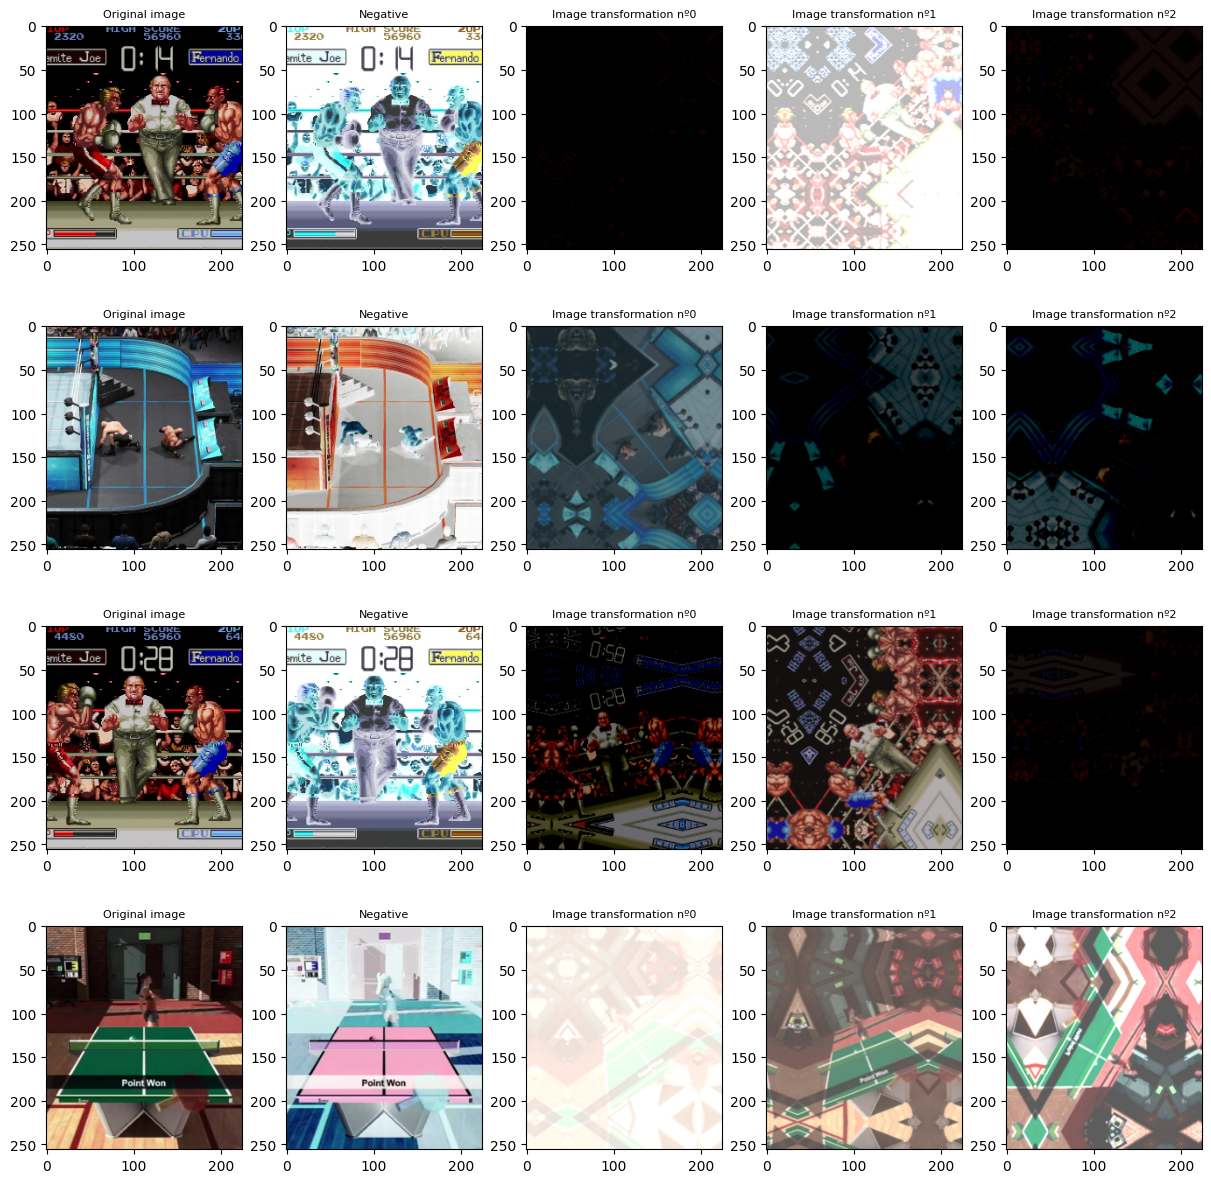

In [58]:
def show_images_augmented(batch_x, augmentation_pipe, trials=3, fig_size=(12, 12)):
    # Create figure and axes objects
    fig, axs = plt.subplots(len(batch_x), trials+2, figsize=fig_size, constrained_layout=True)
    for i, img in enumerate(batch_x):
        axs[i, 0].imshow(tf.cast(img, tf.int32)) # show the original image
        axs[i, 0].set_title("Original image", size=8)

        negative = tf.math.subtract(255, img) # Add column for negative transformation
        axs[i, 1].imshow(tf.cast(negative, tf.int32)) # show the negative transformed image
        axs[i, 1].set_title("Negative", size=8)

        for t in range(trials):
            augmented_img = augmentation_pipe(img, training=True)
            axs[i, t+2].imshow(tf.cast(augmented_img, tf.int32)) # show the transformed image
            axs[i, t+2].set_title("Image transformation nº{}".format(t), size=8)

    plt.show()

show_images_augmented(batch_x_train[0:4], augmentation_pipe = augmentation)


In here, the code and also the output is very similar to the previous one, but as we refered in the beggining, we did the same thing multiple times, just by changing some parameters, in order to better understand what were the best approaches.

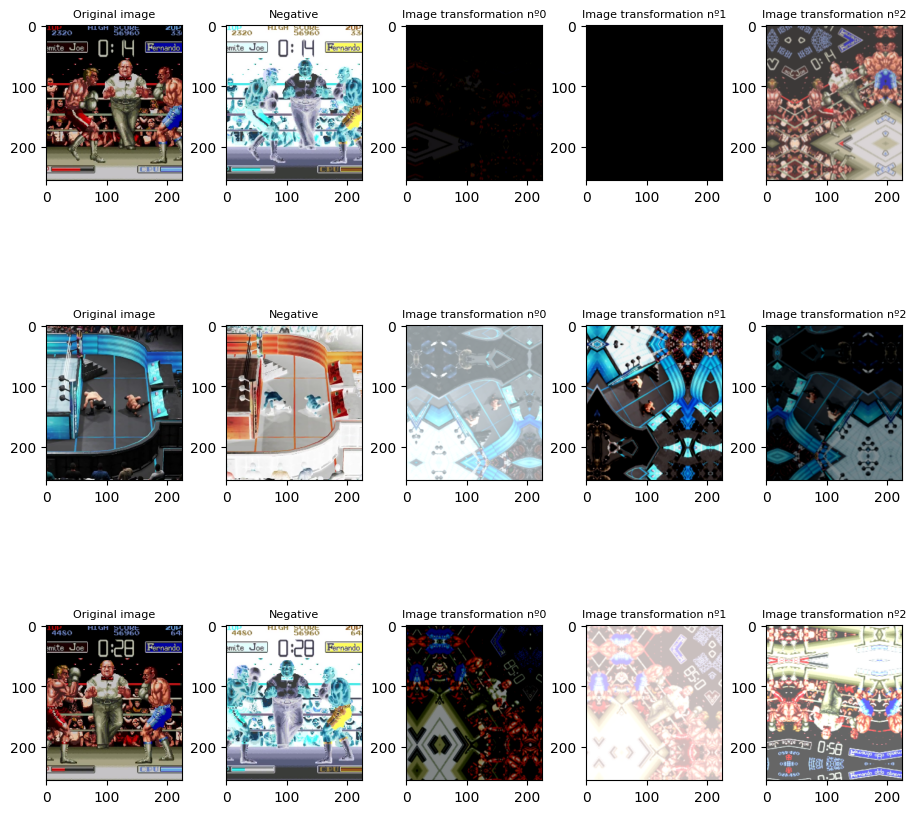

In [59]:
def show_images_augmented(batch_x, augmentation_pipe, trials=3, fig_size=(9, 9)):
    # Create figure and axes objects
    fig, axs = plt.subplots(len(batch_x), trials + 2, figsize=fig_size, constrained_layout=True)
    for i, img in enumerate(batch_x):
        axs[i, 0].imshow(tf.cast(img, tf.int32)) # show the original image
        axs[i, 0].set_title("Original image", size=8)
        
        negative = tf.math.subtract(255, img) # Add column for negative transformation
        axs[i, 1].imshow(tf.cast(negative, tf.int32)) # show the negative transformed image
        axs[i, 1].set_title("Negative", size=8)
        
        margin = random_shear(negative, intensity=25)  # Add column for margin transformation
        axs[i, 2].imshow(tf.cast(margin, tf.int32)) # show the margin transformed image
        axs[i, 2].set_title("Margin", size=8)

        saturation = tf.image.adjust_saturation(img, 3) # adjust saturation of RGB images
        axs[i, 3].imshow(tf.cast(saturation, tf.int32)) 
        axs[i, 3].set_title("Saturation", size=8)

        cropped = tf.image.central_crop(img, central_fraction=0.5)
        axs[i, 4].imshow(tf.cast(cropped, tf.int32)) 
        axs[i, 4].set_title("Cropped", size=8) # central crop to the image

        for t in range(trials):
            augmented_img = augmentation_pipe(img, training=True)
            axs[i, t+2].imshow(tf.cast(augmented_img, tf.int32)) # show the transformed image
            axs[i, t+2].set_title("Image transformation nº{}".format(t), size=8)
    plt.show()

show_images_augmented(batch_x_train[0:3], augmentation_pipe = augmentation)


In here, we created also the grid where we can see the original images and the next 4 columns are: negative color transformation, margin tranformation, saturation ahcnage and central crop the image

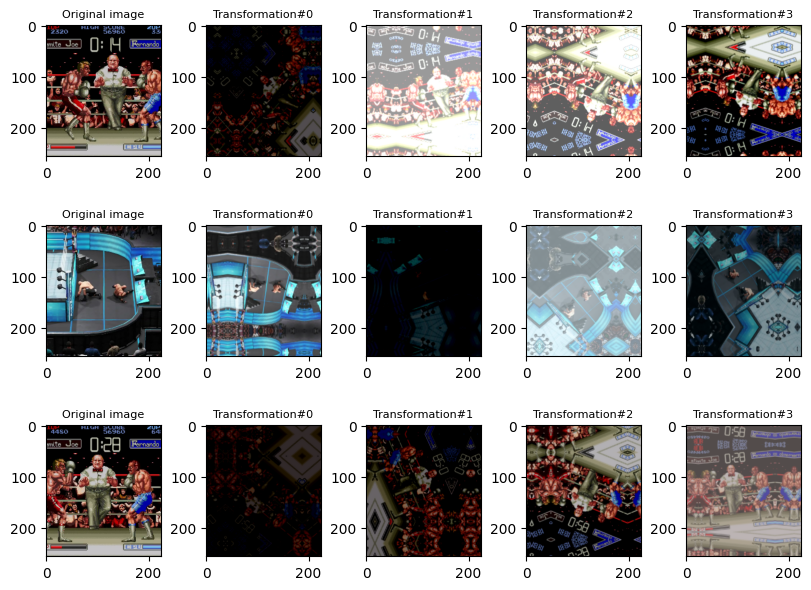

In [60]:
def augment_show(batch_x, augmentation_pipe, trials=4, fig_size=(14, 10)):
    _, axs = plt.subplots(len(batch_x), trials + 1, figsize=(8, 6), layout='constrained')
    for i, img in enumerate(batch_x):
        axs[i, 0].imshow(tf.cast(img, tf.int32)) # show the original image
        axs[i, 0].set_title("Original image", size=8)
        for t in range(trials):
            augmented_i = augmentation_pipe(img, training=True) #pass through the augmentation pipeline
            axs[i, t+1].imshow(tf.cast(augmented_i, tf.int32))
            axs[i, t+1].set_title("Transformation#{}".format(t), size=8)

augment_show(batch_x_train[0:3], augmentation_pipe=augmentation)

This functions was designed to display a series of augmented images using the augmentation pipeline. 
For each image, the function displays the original images in the first column and the resulting augmented in the next 4 columns.

## 4.2 - Final augmentation

In [61]:
# implement augmentation on the batch of images during the train
augmentation = Sequential([layers.Rescaling(scale=1./255), # normalize pixel values to [0,1]]
                           layers.RandomFlip(mode='horizontal_and_vertical'), # horizontal flip
                           layers.RandomCrop(width=250, height=250), # randomly crop the image
                           layers.RandomRotation(factor=0.35), #rotating in the range [-20%*2pi, 20%*2pi]
                           layers.RandomZoom(height_factor=(0.5, 0.5), width_factor=(0.5, 0.5)), # zoom images
                           layers.RandomContrast(factor=0.60), #randomly adjusts contrast
                           layers.RandomBrightness(factor=0.74), #-0.2 for the lower bound and 0.2 for the upper bound
                           layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode="reflect")],
                          name="augmentation_pipe")

This code defines an image data augmentation pipeline using the Keras preprocessing layers. The pipeline includes the following image transformations:
- Rescaling: Normalizes the pixel values to [0, 1].
- RandomFlip: Flips randomly the image horizontally and/or vertically.
- RandomCrop: Crops randomly the image to a specified width and height.
- RandomRotation: Rotates randomly the image within a specified range of angles.
- RandomZoom: Zooms randomly in/out on the image by a specified factor.
- RandomContrast: Adjusts randomly the contrast of the image by a specified factor.
- RandomBrightness: Adjusts randomly the brightness of the image by a specified factor.
- RandomTranslation: Translates randomly the image vertically and/or horizontally by a specified factor, with a fill mode of "reflect" to fill in any empty space.
